In [19]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [4]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x138f4027bc8>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
# results = pd.read_sql("SELECT tobs as JUNE_TEMP FROM Measurement where strftime('%m', Measurement.date) = '06'", engine)
june_results = session.query(Measurement.tobs).filter(extract('month',Measurement.date) == 6).all()
june_results

[(78.0),
 (76.0),
 (78.0),
 (76.0),
 (77.0),
 (78.0),
 (77.0),
 (78.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (78.0),
 (78.0),
 (77.0),
 (77.0),
 (82.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (76.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (78.0),
 (73.0),
 (70.0),
 (76.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (78.0),
 (77.0),
 (77.0),
 (78.0),
 (78.0),
 (77.0),
 (78.0),
 (78.0),
 (75.0),
 (76.0),
 (76.0),
 (77.0),
 (78.0),
 (76.0),
 (77.0),
 (75.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (77.0),
 (77.0),
 (76.0),
 (78.0),
 (77.0),
 (76.0),
 (77.0),
 (76.0),
 (76.0),
 (77.0),
 (77.0),
 (78.0),
 (77.0),
 (77.0),
 (77.0),
 (76.0),
 (75.0),
 (76.0),
 (76.0),
 (77.0),
 (76.0),
 (73.0),
 (73.0),
 (75.0),
 (77.0),
 (76.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (79.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (78.0),
 (77.0),
 (76.0),
 (78.0),
 (78.0),
 (77.0),
 (78.0),
 (78.0),
 (73.0),
 (76.0),
 (77.0),
 (75.0),
 (76.0),
 (74.0),
 

In [6]:
#  3. Convert the June temperatures to a list.
june_results = list(np.ravel(june_results))
june_results

[78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 77.0,
 77.0,
 82.0,
 78.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 73.0,
 70.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 75.0,
 76.0,
 76.0,
 77.0,
 78.0,
 76.0,
 77.0,
 75.0,
 77.0,
 76.0,
 76.0,
 75.0,
 77.0,
 77.0,
 76.0,
 78.0,
 77.0,
 76.0,
 77.0,
 76.0,
 76.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 73.0,
 75.0,
 77.0,
 76.0,
 77.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 79.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 76.0,
 77.0,
 75.0,
 76.0,
 74.0,
 75.0,
 77.0,
 76.0,
 77.0,
 78.0,
 79.0,
 77.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 78.0,
 79.0,
 79.0,
 82.0,
 80.0,
 79.0,
 79.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 75.0,
 75.0,
 76.0,
 84.0,
 79.0,
 76.0,
 79.0,

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results)
print(june_df)

         0
0     78.0
1     76.0
2     78.0
3     76.0
4     77.0
...    ...
1695  79.0
1696  74.0
1697  74.0
1698  76.0
1699  75.0

[1700 rows x 1 columns]


In [9]:
# Rename column
june_df = june_df.rename(columns={0: 'June Temp'})
#df.rename(index={'0': 'June Temp'})
#df.rename(columns={0: 'June Temp'})
#df['June Temp']=df[0]
#df=df[['June Temp']]
print(june_df)

      June Temp
0          78.0
1          76.0
2          78.0
3          76.0
4          77.0
...         ...
1695       79.0
1696       74.0
1697       74.0
1698       76.0
1699       75.0

[1700 rows x 1 columns]


In [10]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


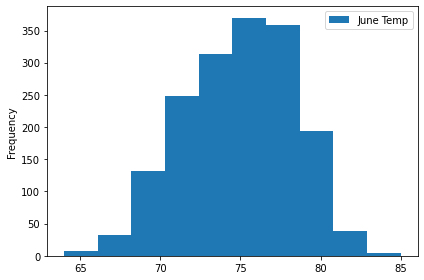

In [11]:
june_df.plot.hist(bins=10)
plt.tight_layout()

## D2: Determine the Summary Statistics for December

In [12]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
# results = pd.read_sql("SELECT tobs as JUNE_TEMP FROM Measurement where strftime('%m', Measurement.date) = '12'", engine)
dec_results = session.query(Measurement.tobs).filter(extract('month',Measurement.date) == 12).all()

In [13]:
# 7. Convert the December temperatures to a list.
dec_results = list(np.ravel(dec_results))

In [15]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results)
dec_df = dec_df.rename(columns={0: 'December Temp'})
print(dec_df)

      December Temp
0              76.0
1              74.0
2              74.0
3              64.0
4              64.0
...             ...
1512           71.0
1513           71.0
1514           69.0
1515           65.0
1516           65.0

[1517 rows x 1 columns]


In [16]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# Challenge 3 - Summary
### Two additional queries to perform to gather more weather data for June and December

In [25]:
pd.read_sql("""SELECT station, count(station) as count, min(tobs) as min,max(tobs) as max,avg(tobs) as avg 
                FROM Measurement where strftime('%m', Measurement.date) = '06' group by station 
                order by count desc""", engine)

,station,count,min,max,avg
0,USC00519397,236,70.0,84.0,77.559322
1,USC00519281,236,65.0,82.0,73.271186
2,USC00513117,236,68.0,83.0,74.050847
3,USC00519523,232,71.0,82.0,76.668103
4,USC00516128,223,66.0,79.0,71.937220
5,USC00514830,186,67.0,81.0,76.005376
6,USC00511918,165,66.0,85.0,74.139394
7,USC00517948,148,64.0,82.0,76.655405
8,USC00518838,38,67.0,78.0,73.394737


In [27]:
pd.read_sql("""SELECT station, count(station) as count, min(tobs) as min,max(tobs) as max,avg(tobs) as avg 
                FROM Measurement where strftime('%m', Measurement.date) = '12' group by station 
                order by count desc""", engine)

,station,count,min,max,avg
0,USC00519281,217,58.0,79.0,69.903226
1,USC00513117,216,63.0,80.0,71.069444
2,USC00519523,210,56.0,79.0,72.433333
3,USC00519397,210,56.0,77.0,71.109524
4,USC00516128,206,60.0,83.0,69.291262
5,USC00514830,178,62.0,79.0,73.224719
6,USC00511918,152,57.0,81.0,69.684211
7,USC00517948,109,64.0,82.0,71.834862
8,USC00518838,19,63.0,78.0,72.421053


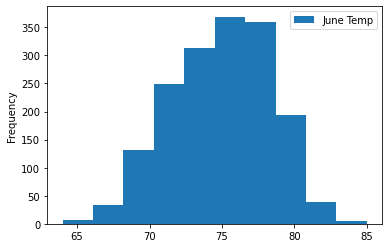

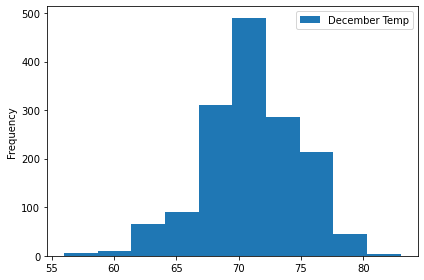

In [28]:
june_df.plot.hist(bins=10)
dec_df.plot.hist(bins=10)
plt.tight_layout()